In [10]:
library(tidyverse)
library(corrplot)   
library(scales)      
library(viridis) 

ERROR: Error in library(corrplot): there is no package called 'corrplot'


### Data cleaning

In [11]:
data_raw <- read.csv(
  "Predator_and_prey_body_sizes_in_marine_food_webs.csv",
  header = TRUE,
  sep = "\t",
  quote = "",
  check.names = TRUE,
  strip.white = TRUE,
  fileEncoding = "latin1"
)

cols_to_keep <- c( "Individual_ID", "Predator",
                  "Predator._taxon", "Predator_lifestage",
                  "Type_of_feeding_interaction", "Standardised.predator.length",
                  "SI.predator.mass", "Diet.coverage",
                  "Prey", "Prey.taxon", "SI.prey.length", "SI.prey.mass",
                  "Geographic.location", "Latitude", "Longitude",
                  "Depth", "Mean.annual.temp", "SD.annual.temp",
                  "Mean.PP", "SD.PP", "Specific.habitat")

data_clean <- data_raw[, cols_to_keep, drop = FALSE]
attach(data_clean)
head(data_clean)

,Individual_ID,Predator,Predator._taxon,Predator_lifestage,Type_of_feeding_interaction,Standardised.predator.length,SI.predator.mass,Diet.coverage,Prey,Prey.taxon,⋯,SI.prey.mass,Geographic.location,Latitude,Longitude,Depth,Mean.annual.temp,SD.annual.temp,Mean.PP,SD.PP,Specific.habitat
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>
1,1,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,93.990,1539.900,all,teleosts/molluscs/crustaceans,mixed,⋯,14.2740,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
2,2,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,95.195,1597.800,all,teleosts/molluscs/crustaceans,mixed,⋯,6.0213,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
3,3,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,100.020,1843.600,all,teleosts/molluscs/crustaceans,mixed,⋯,11.8930,"""""Apalachicola Bay"","" Florida""""","29""""nN","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
4,4,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,34.945,87.631,all,teleosts/molluscs/crustaceans,mixed,⋯,8.1220,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
5,5,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,31.330,63.866,all,teleosts/molluscs/crustaceans,mixed,⋯,6.5623,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
6,6,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,33.740,79.161,all,teleosts/molluscs/crustaceans,mixed,⋯,5.4065,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay


## Replace missing ID

In [12]:
# Trouver les lignes avec ID manquant
missing_idx <- which(data_clean$Individual_ID == "n/a" | is.na(data_clean$Individual_ID))

# Convertir la colonne en numérique (si elle est encore de type "character")
# Les "n/a" deviendront NA
data_clean$Individual_ID <- suppressWarnings(as.numeric(data_clean$Individual_ID))

# Trouver le plus grand ID existant pour continuer la numérotation
max_id <- max(data_clean$Individual_ID, na.rm = TRUE)

# Créer de nouveaux IDs pour les lignes manquantes
new_ids <- seq(from = max_id + 1, length.out = length(missing_idx))

# Remplacer les valeurs manquantes
data_clean$Individual_ID[missing_idx] <- new_ids


tail(data_clean)

## Transformation predator

In [13]:
library(MASS)
library(ggplot2)

Warning message:
"package 'MASS' was built under R version 4.4.3"



Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select




In [14]:
# Import functions from external R files
cat("Loading external R files...\n")

source("Data_load.R") 
cat("✓ Data_load.R loaded\n")

source("Data_visualization.R")  
cat("✓ Data_visualization.R loaded\n")

cat("All functions loaded successfully!\n")

Loading external R files...


✓ Data_load.R loaded
✓ Data_visualization.R loaded
All functions loaded successfully!


In [19]:
colnames(data_clean)

[1] "Individual_ID"                "Predator"                    
 [3] "Predator._taxon"              "Predator_lifestage"          
 [5] "Type_of_feeding_interaction"  "Standardised.predator.length"
 [7] "SI.predator.mass"             "Diet.coverage"               
 [9] "Prey"                         "Prey.taxon"                  
[11] "SI.prey.length"               "SI.prey.mass"                
[13] "Geographic.location"          "Latitude"                    
[15] "Longitude"                    "Depth"                       
[17] "Mean.annual.temp"             "SD.annual.temp"              
[19] "Mean.PP"                      "SD.PP"                       
[21] "Specific.habitat"

In [20]:
si_predator_length <- data_clean$Standardised.predator.length
si_prey_length <- data_clean$SI.prey.length


Original data points: 34931 
Filtered data points: 34896 
Removed 35 problematic values
Using threshold: 0.4466 
Estimated Weibull parameters:
Shape: 1.0961 
Scale: 70.482 
✓ Transformation completed successfully!


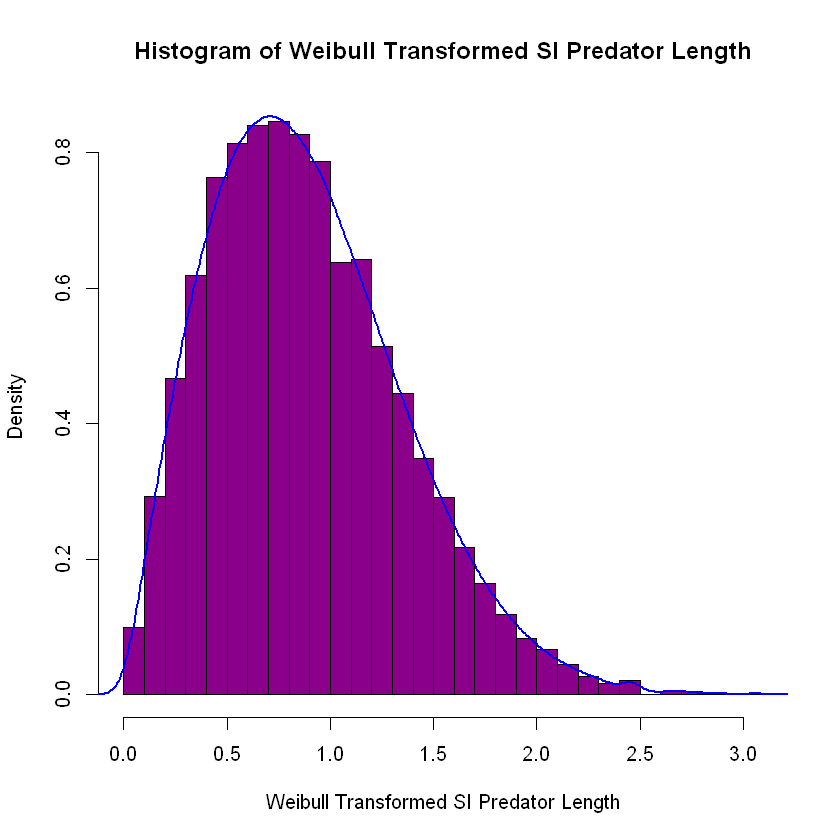

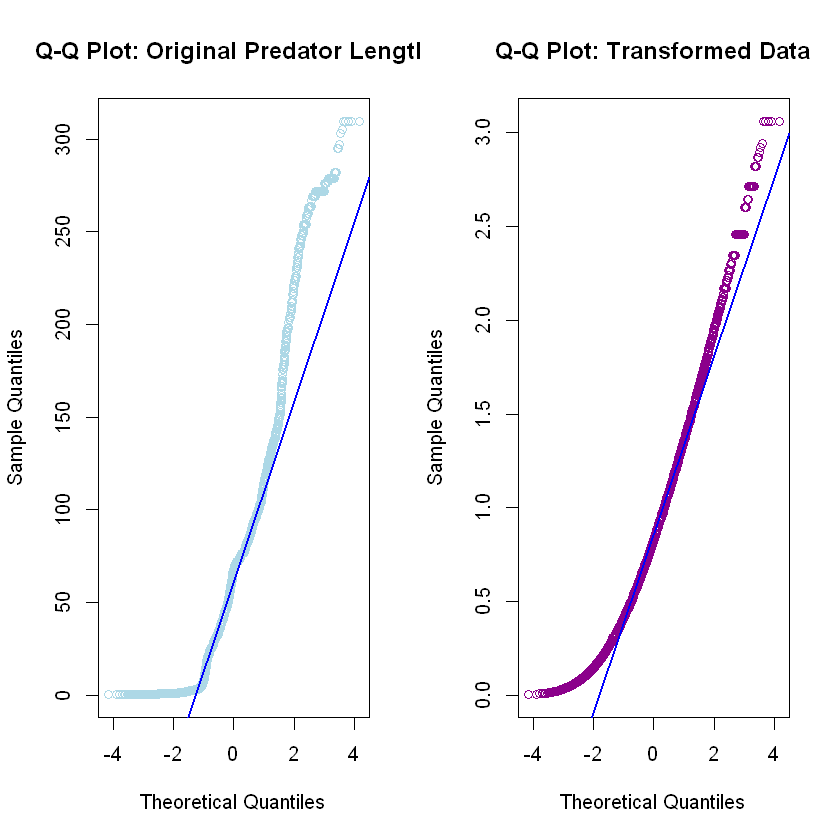

In [22]:
# Clean approach: Use the improved weibull_transformation function
weibull_transformed_pred_length <- weibull_transformation(si_predator_length)

# Create plots using the visualization functions
hist_plot(weibull_transformed_pred_length, 
          main = "Histogram of Weibull Transformed SI Predator Length", 
          xlab = "Weibull Transformed SI Predator Length")

qq_plot_comparison(si_predator_length, weibull_transformed_pred_length,
                  title_original = "Q-Q Plot: Original Predator Length")

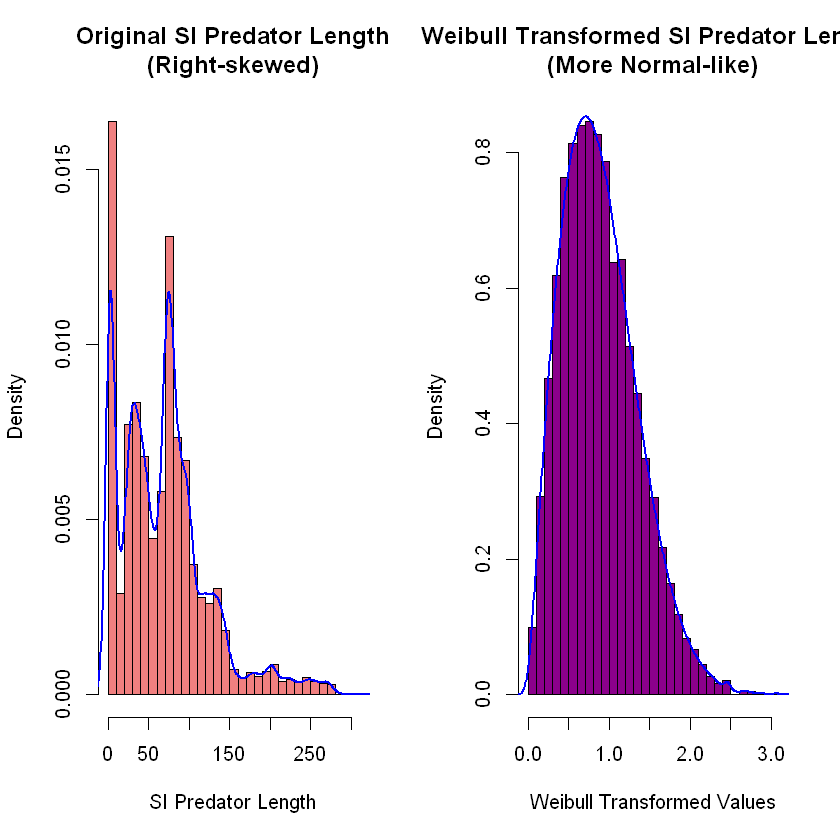

In [23]:
# Compare original vs Weibull transformed data side by side
par(mfrow=c(1,2))

# Original data
hist_plot(si_predator_length,
     main = "Original SI Predator Length\n(Right-skewed)",
     xlab = "SI Predator Length",
     color = "lightcoral")

# Weibull transformed data (uses default darkmagenta color)
hist_plot(weibull_transformed_pred_length,
     main = "Weibull Transformed SI Predator Length\n(More Normal-like)",
     xlab = "Weibull Transformed Values")

# Reset plotting parameters
par(mfrow=c(1,1))

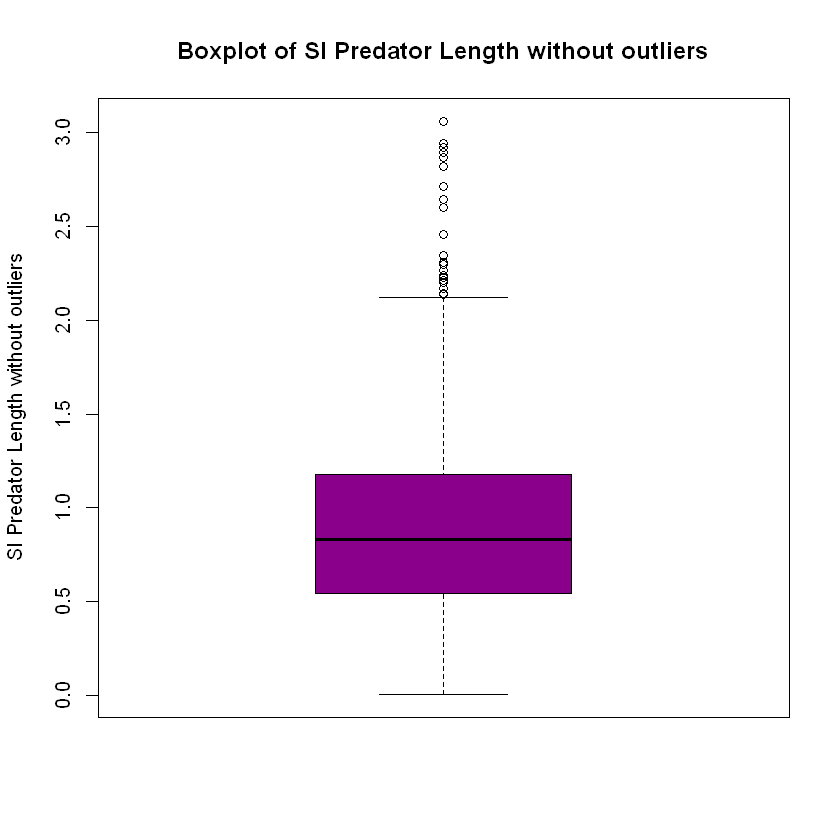

In [24]:
boxplot(weibull_transformed_pred_length,
        main = "Boxplot of SI Predator Length without outliers",
        ylab = "SI Predator Length without outliers",
        col="darkmagenta"
)

In [25]:
si_pred_length_clean <- remove_outliers(si_predator_length)

Original data points: 34931 
Clean data points: 33484 
Outliers removed: 1447 
Percentage of outliers: 4.14 %


Original data points: 33484 
Filtered data points: 33451 
Removed 33 problematic values
Using threshold: 0.4462 
Estimated Weibull parameters:
Shape: 1.1694 
Scale: 64.2637 
✓ Transformation completed successfully!


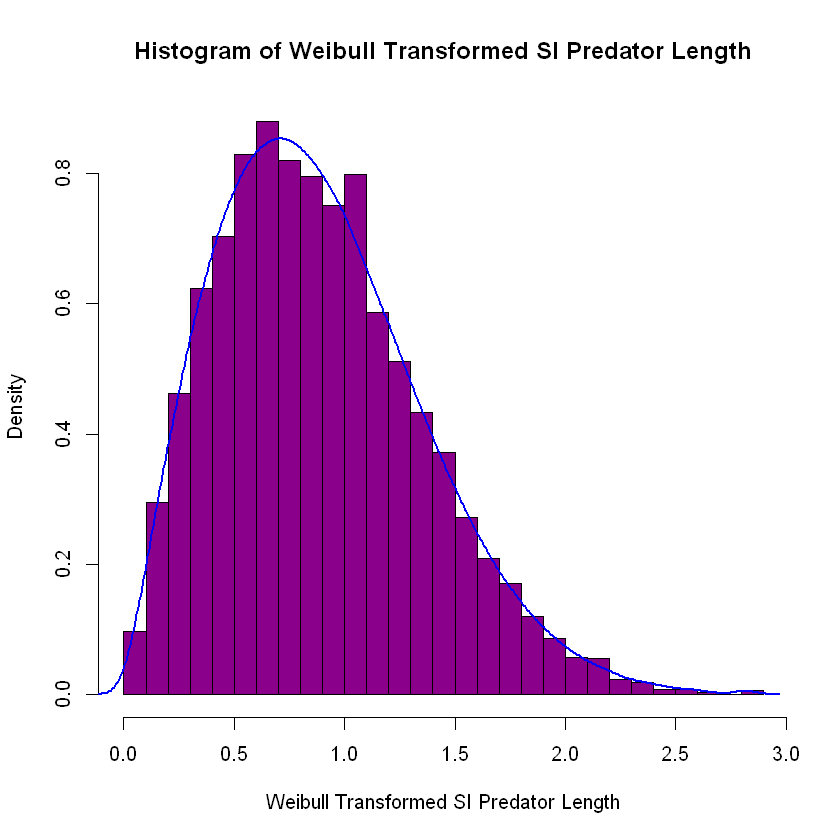

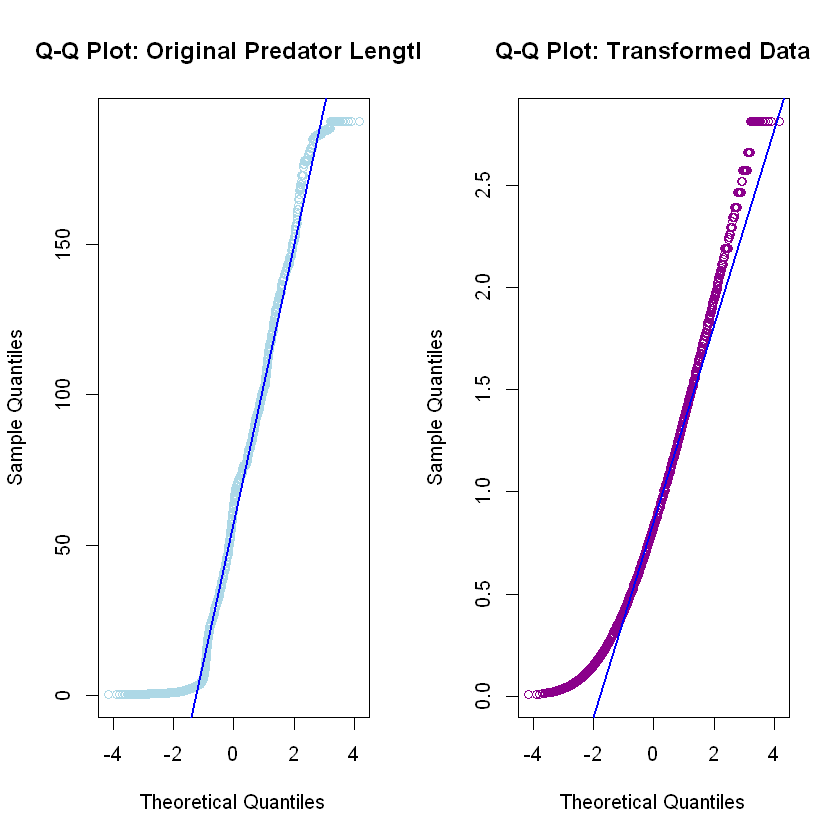

In [26]:
# Clean approach: Use the improved weibull_transformation function
weibull_transformed_pred_length_clean <- weibull_transformation(si_pred_length_clean)

# Create plots using the visualization functions
hist_plot(weibull_transformed_pred_length_clean, 
          main = "Histogram of Weibull Transformed SI Predator Length", 
          xlab = "Weibull Transformed SI Predator Length")

qq_plot_comparison(si_pred_length_clean, weibull_transformed_pred_length_clean,
                  title_original = "Q-Q Plot: Original Predator Length")

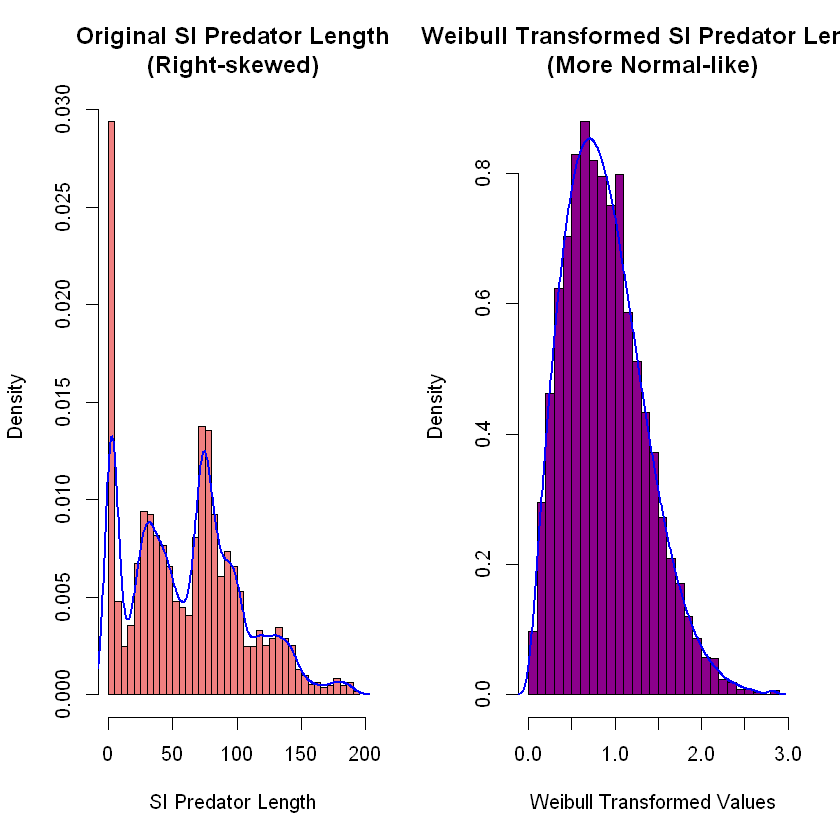

In [27]:
# Compare original vs Weibull transformed data side by side
par(mfrow=c(1,2))

# Original data
hist_plot(si_pred_length_clean,
     main = "Original SI Predator Length\n(Right-skewed)",
     xlab = "SI Predator Length",
     color = "lightcoral")

# Weibull transformed data (uses default darkmagenta color)
hist_plot(weibull_transformed_pred_length_clean,
     main = "Weibull Transformed SI Predator Length\n(More Normal-like)",
     xlab = "Weibull Transformed Values")

# Reset plotting parameters
par(mfrow=c(1,1))

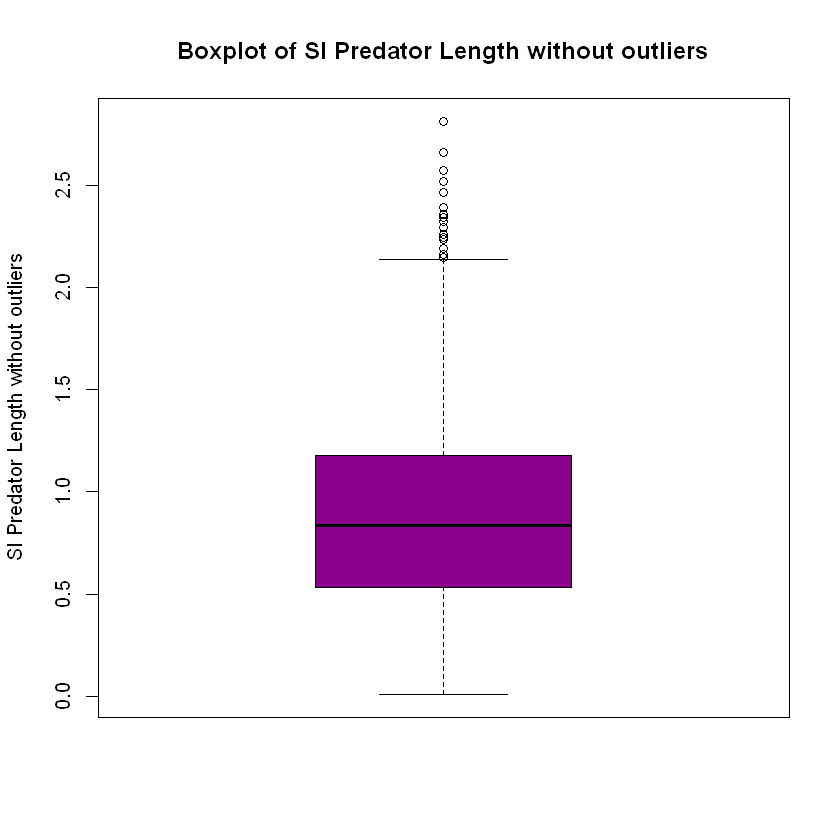

In [28]:
boxplot(weibull_transformed_pred_length_clean,
        main = "Boxplot of SI Predator Length without outliers",
        ylab = "SI Predator Length without outliers",
        col="darkmagenta"
)

## Prey analysis

In [29]:
si_prey_length_clean <- remove_outliers(si_prey_length)

Original data points: 34931 
Clean data points: 33809 
Outliers removed: 1122 
Percentage of outliers: 3.21 %


Original data points: 33809 
Filtered data points: 30837 
Removed 2972 problematic values
Using threshold: 0.1 
Estimated Weibull parameters:
Shape: 1.1555 
Scale: 8.1876 
✓ Transformation completed successfully!


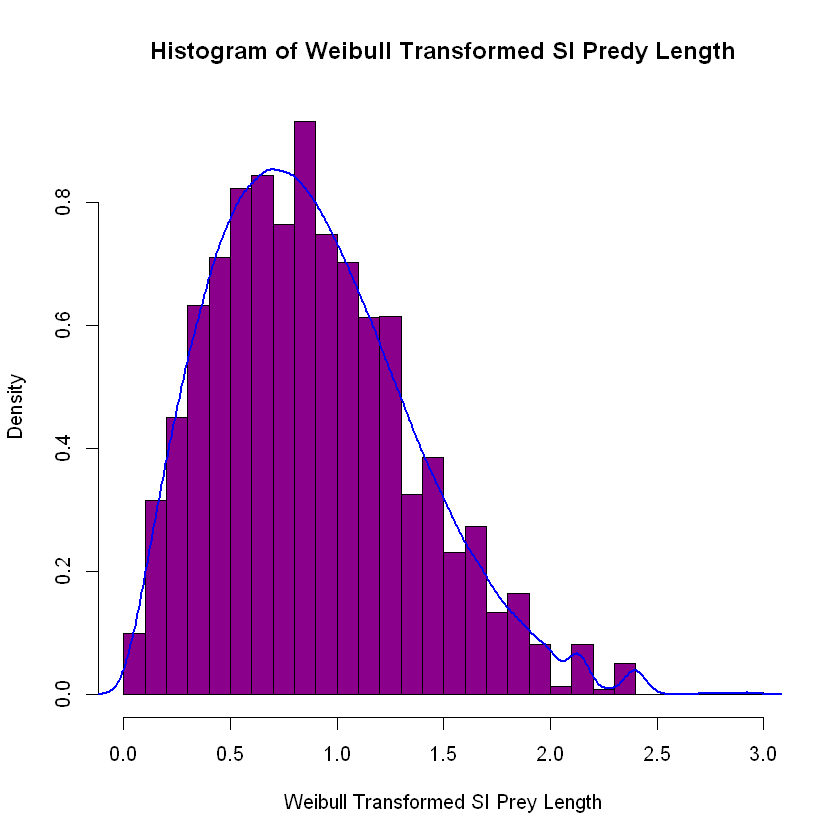

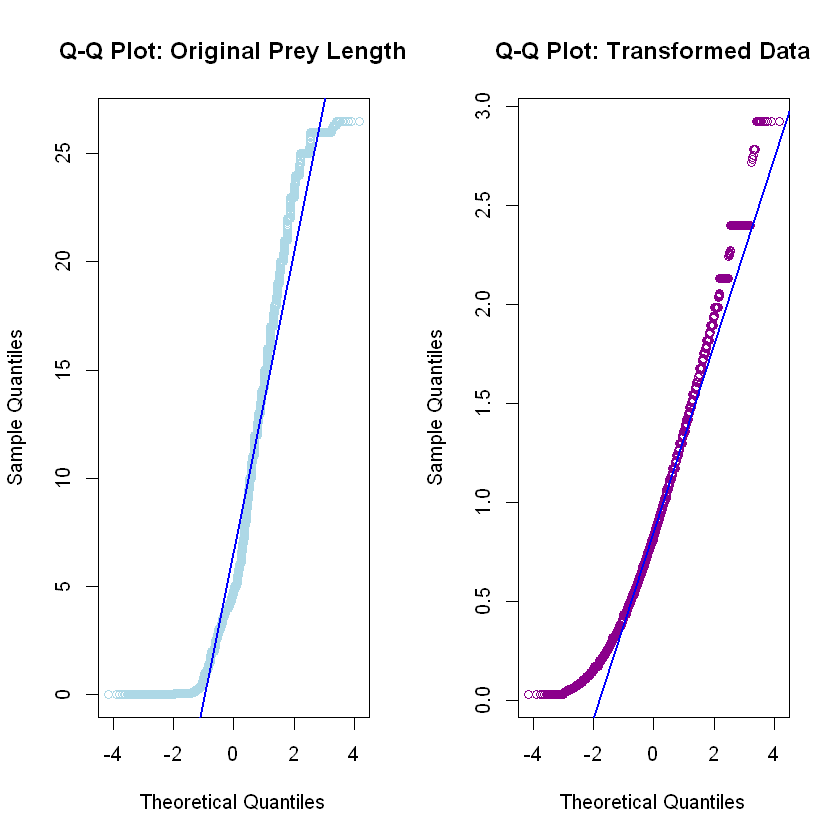

In [30]:
# Clean approach: Use the improved weibull_transformation function
weibull_transformed_prey_length <- weibull_transformation(si_prey_length_clean)

# Create plots using the visualization functions
hist_plot(weibull_transformed_prey_length, 
          main = "Histogram of Weibull Transformed SI Predy Length", 
          xlab = "Weibull Transformed SI Prey Length")

qq_plot_comparison(si_prey_length_clean, weibull_transformed_prey_length,
                  title_original = "Q-Q Plot: Original Prey Length")

aa

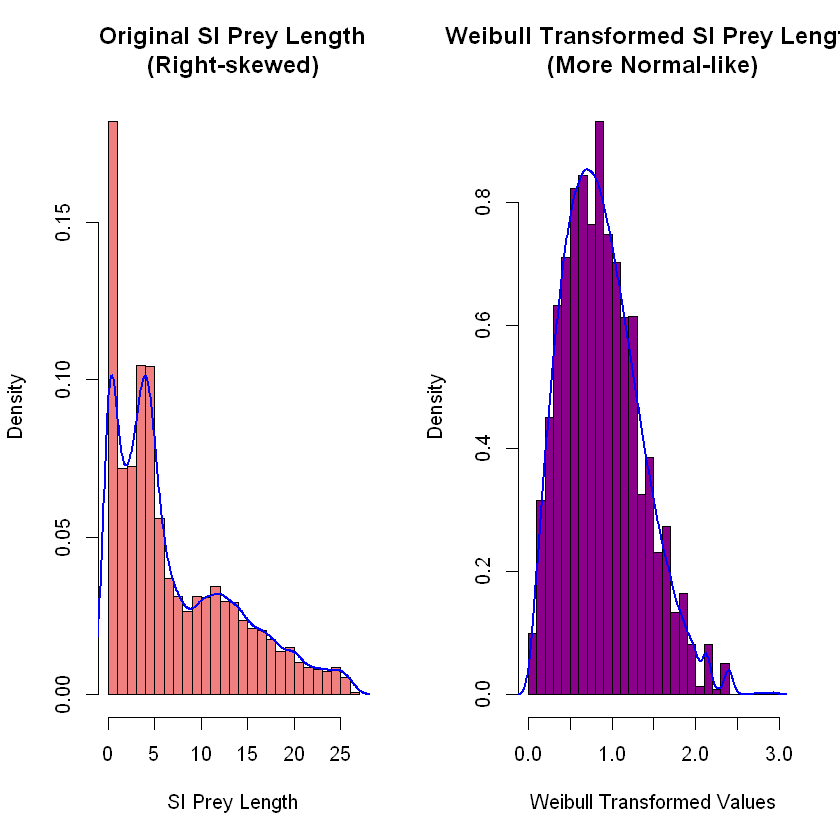

In [31]:
# Compare original vs Weibull transformed data side by side
par(mfrow=c(1,2))

# Original data
hist_plot(si_prey_length_clean,
     main = "Original SI Prey Length\n(Right-skewed)",
     xlab = "SI Prey Length",
     color="lightcoral",
     )
cat("aa")
# Weibull transformed data  
hist_plot(weibull_transformed_prey_length,
     main = "Weibull Transformed SI Prey Length\n(More Normal-like)",
     xlab = "Weibull Transformed Values",
     )

# Reset plotting parameters
par(mfrow=c(1,1))

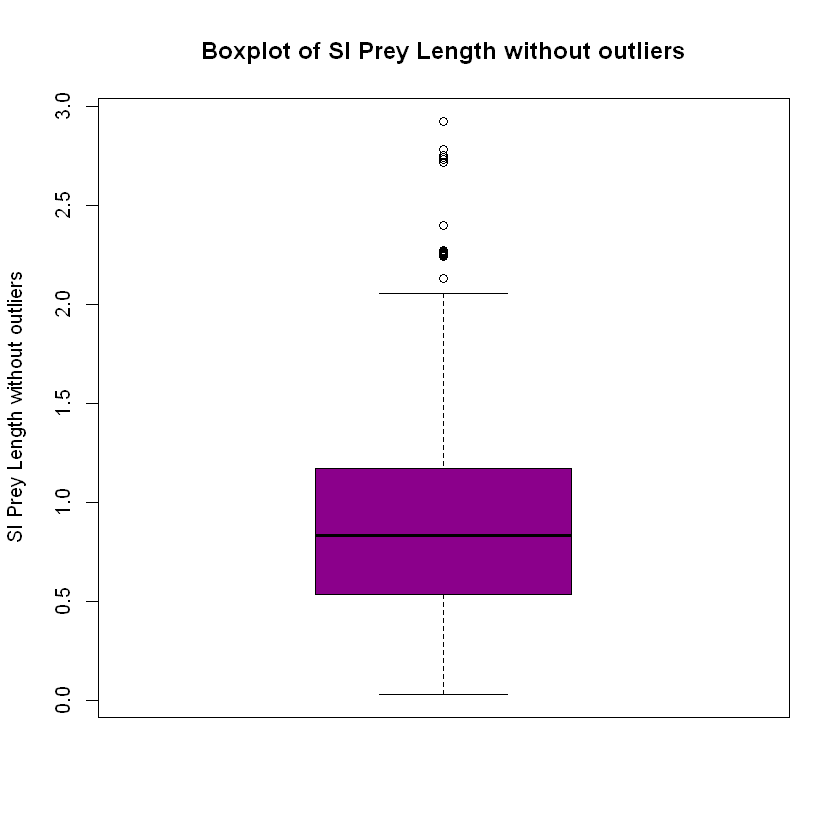

In [32]:
boxplot(weibull_transformed_prey_length,
        main = "Boxplot of SI Prey Length without outliers",
        ylab = "SI Prey Length without outliers",
        col="darkmagenta"
)

### Predation intensity

               Df Sum Sq Mean Sq F value Pr(>F)    
Predator       92    659   7.160   5.759 <2e-16 ***
Residuals   34838  43314   1.243                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Warning message:
“not plotting observations with leverage one:
  18795, 28164, 28291, 28292”


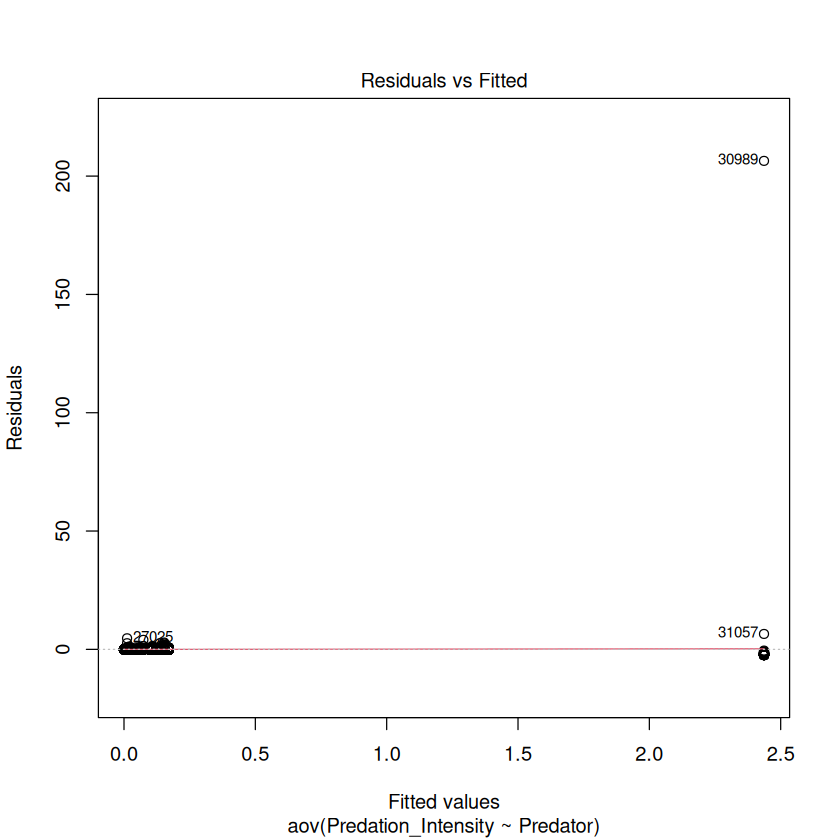

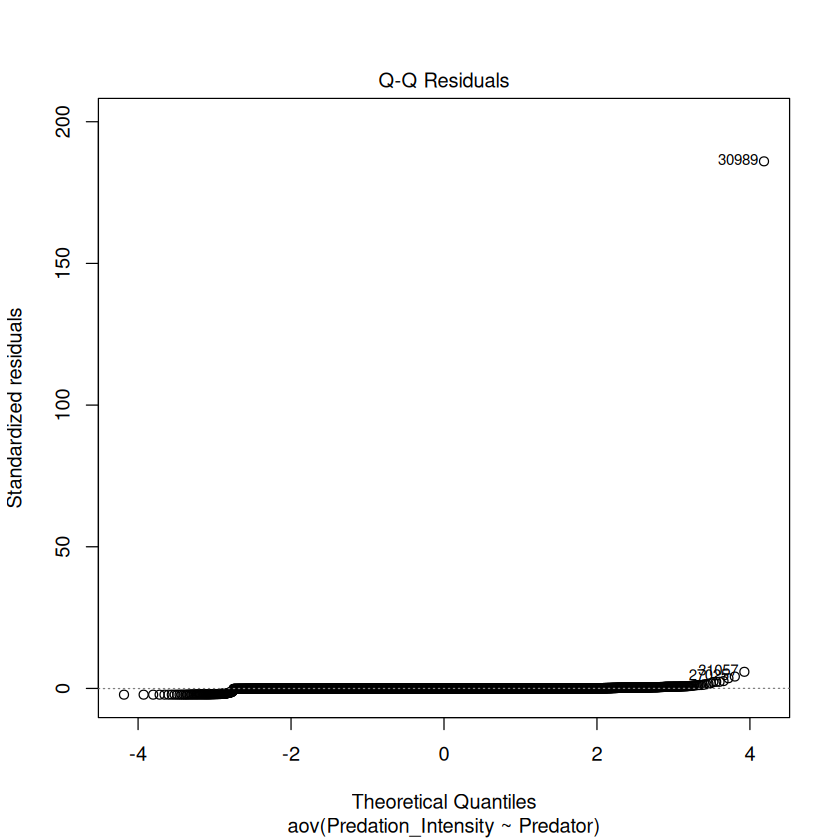

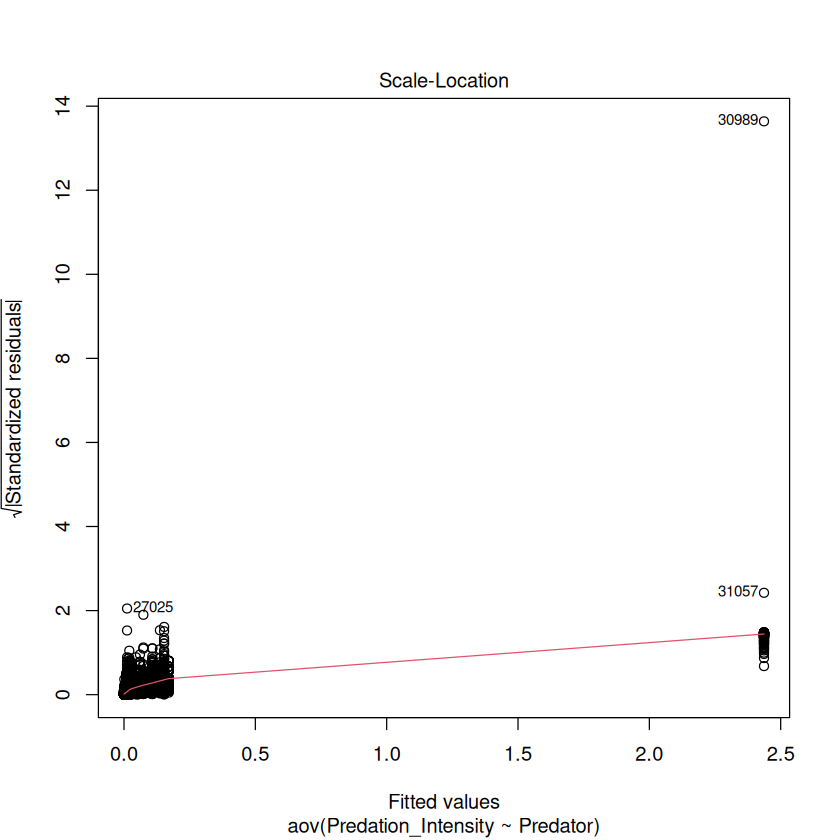

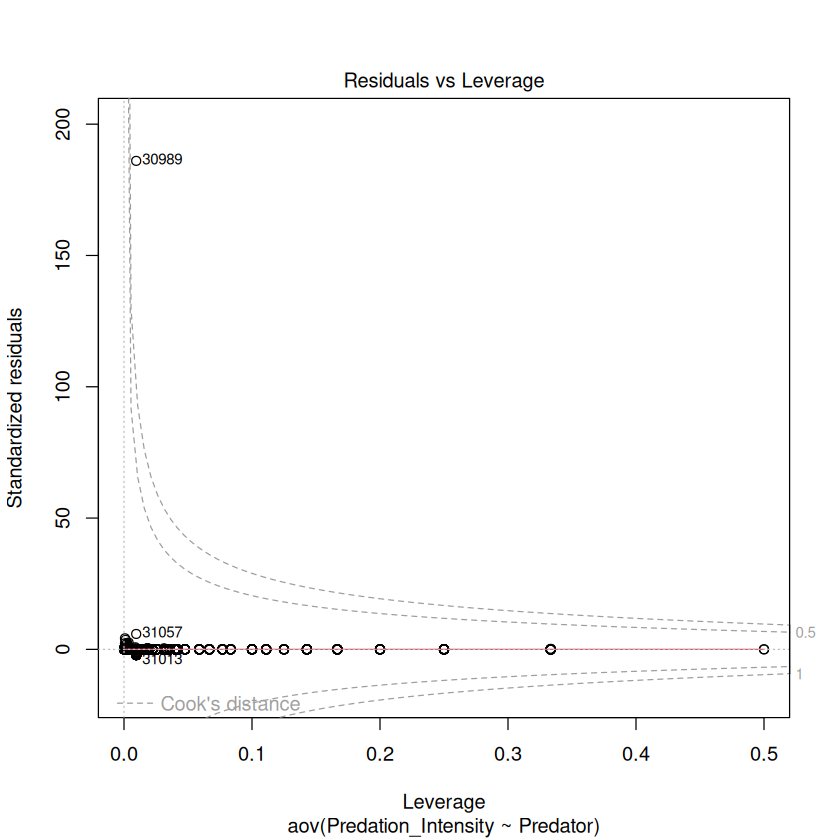

In [4]:
# Intesite de predation = prey mass / predator mass :

# Rjt colonne Predation Intensity
data_clean <- data_clean %>%
  mutate(Predation_Intensity = SI.prey.mass / SI.predator.mass)

anova_length <- aov(Predation_Intensity ~ Predator, data = data_clean)
summary(anova_length)
plot(anova_length)

### Visualization

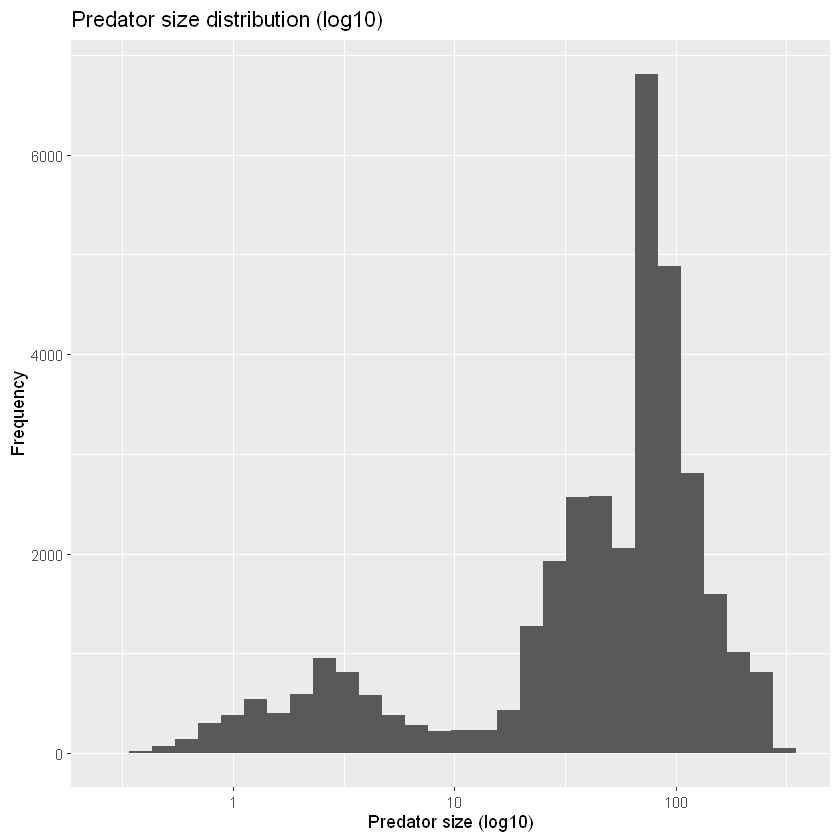

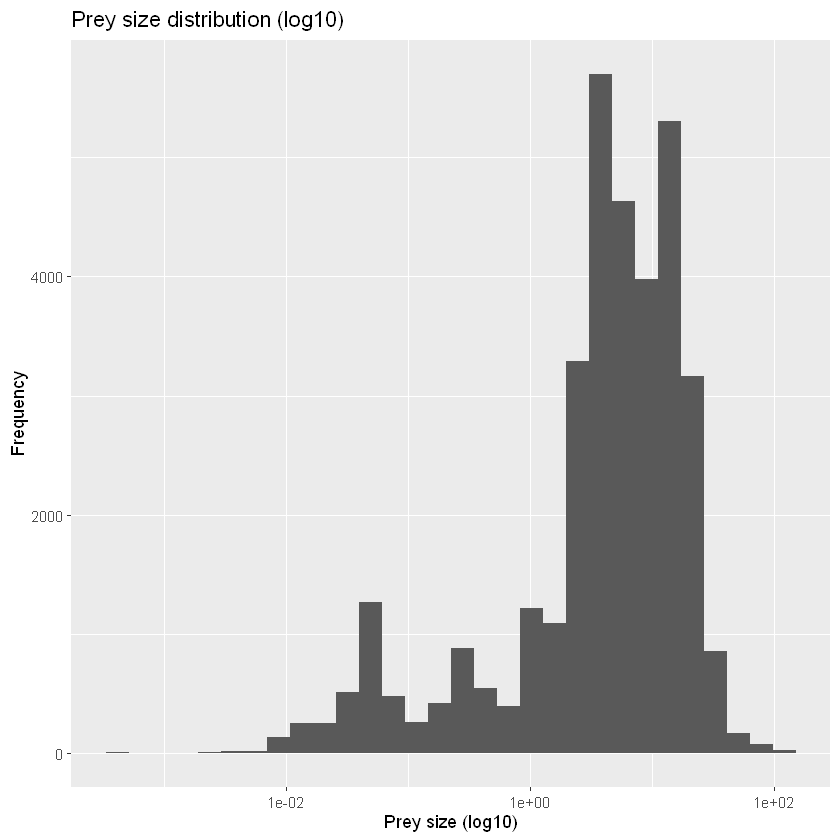

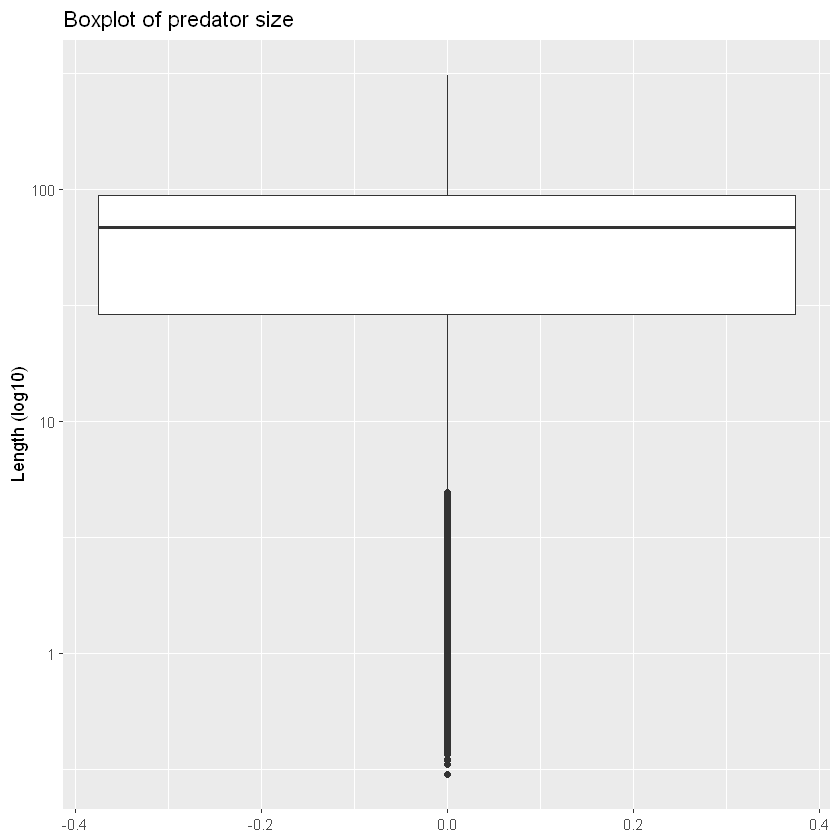

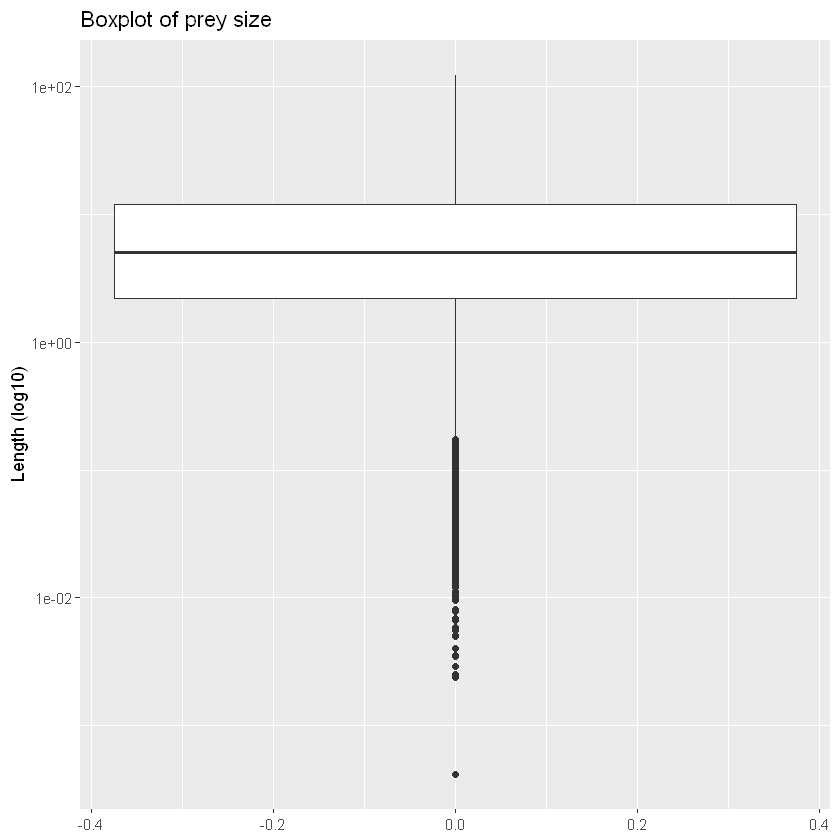

In [33]:
ggplot(data_clean, aes(x = Standardised.predator.length)) +
  geom_histogram(bins = 30) +
  scale_x_log10() +
  labs(title = "Predator size distribution (log10)",
       x = "Predator size (log10)", y = "Frequency")

ggplot(data_clean, aes(x = SI.prey.length)) +
  geom_histogram(bins = 30) +
  scale_x_log10() +
  labs(title = "Prey size distribution (log10)",
       x = "Prey size (log10)", y = "Frequency")

ggplot(data_clean, aes(y = Standardised.predator.length)) +
  geom_boxplot() +
  scale_y_log10() +
  labs(title = "Boxplot of predator size", y = "Length (log10)")

ggplot(data_clean, aes(y = SI.prey.length)) +
  geom_boxplot() +
  scale_y_log10() +
  labs(title = "Boxplot of prey size", y = "Length (log10)")